## Wrangle and Analyze Data

## Gather

In [1]:
# import statement

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import tweepy
import json
import re
import seaborn as sns



In [2]:
# Read csv file
twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Download and import image_predictions TSV file into a DataFrame
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'    
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

twitter_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')


In [4]:
# Setting up the Twitter API with authentication pieces
consumer_key = ' '
consumer_secret = ' '
access_token = ' '
access_secret = ' '

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# Use Twitter API to collect status data on tweets present in twitter1 dataframe
#tweet_ids = list(twitter['tweet_id'])
#
#tweet_data = []
#tweet_id_success = []
#tweet_id_missing = []
#for tweet_id in tweet_ids:
#    try:
#        data = api.get_status(tweet_id, 
#                              tweet_mode='extended',
#                              wait_on_rate_limit = True,
#                              wait_on_rate_limit_notify = True)
#        tweet_data.append(data)
#        tweet_id_success.append(tweet_id)
#    except:
#        tweet_id_missing.append(tweet_id)

In [6]:
# Write tweet data to json file
#with open('tweet_json.txt', mode = 'w') as file:
#    json.dump(tweet_data, file)
    

In [7]:
# Load the Twitter API data
twitter_add = pd.read_json('tweet_json.txt')
twitter_add = twitter_add[['id', 'favorite_count', 'retweet_count']]
twitter_add=twitter_add.rename(columns = {'id':'tweet_id'})

## Assess

In [8]:
# Display the twitter table
twitter.sample(8)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1488,692919143163629568,NaN,NaN,2016-01-29 03:56:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please only send in dogs. Don't submit other t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692919143...,9,10,None,None,None,None,None
1337,705102439679201280,NaN,NaN,2016-03-02 18:48:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Terrenth. He just stubbed his toe. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705102439...,10,10,Terrenth,None,None,None,None
383,827199976799354881,NaN,NaN,2017-02-02 17:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wins every game of chess h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827199976...,13,10,Charlie,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
2065,671151324042559489,NaN,NaN,2015-11-30 02:18:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*struggling to breathe properly* 12/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671151324...,12,10,None,None,None,None,None
2290,667171260800061440,NaN,NaN,2015-11-19 02:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kenneth. He likes Reese's Puffs. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667171260...,10,10,Kenneth,None,None,None,None
1688,681523177663676416,NaN,NaN,2015-12-28 17:12:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carly. She's actually 2 dogs fused tog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681523177...,12,10,Carly,None,None,None,None
1079,739238157791694849,NaN,NaN,2016-06-04 23:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,None,None,None


In [9]:
# Display the twitter_predictions table
twitter_predictions.sample(8)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2035,884162670584377345,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True
19,666273097616637952,https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg,1,Italian_greyhound,0.176053,True,toy_terrier,0.111884,True,basenji,0.111152,True
1218,743609206067040256,https://pbs.twimg.com/media/ClHUkhQWAAAy7Yj.jpg,3,Weimaraner,0.982794,True,American_Staffordshire_terrier,0.004766,True,Great_Dane,0.003432,True
1851,840370681858686976,https://pbs.twimg.com/media/C6mYrK0UwAANhep.jpg,1,teapot,0.981819,False,cup,0.014026,False,coffeepot,0.002421,False
1749,823699002998870016,https://pbs.twimg.com/media/C25d3nkXEAAFBUN.jpg,1,cairn,0.203999,True,snorkel,0.171893,False,Norfolk_terrier,0.107543,True
1587,798209839306514432,https://pbs.twimg.com/media/CxPPnCYWIAAo_ao.jpg,1,Pekinese,0.524583,True,Shih-Tzu,0.102931,True,Pomeranian,0.097893,True
1868,844223788422217728,https://pbs.twimg.com/media/C7dJCnqU4AAswat.jpg,1,Labrador_retriever,0.719510,True,Chesapeake_Bay_retriever,0.122019,True,Newfoundland,0.038828,True
1321,756303284449767430,https://pbs.twimg.com/media/Cn7tyyZWYAAPlAY.jpg,1,golden_retriever,0.981652,True,cocker_spaniel,0.006790,True,Labrador_retriever,0.004325,True


In [10]:
# Display the twitter_add table
twitter_add.sample(8)

,tweet_id,favorite_count,retweet_count
1425,696744641916489729,2151,990
1283,707629649552134146,2678,930
1386,699370870310113280,1958,461
484,813142292504645637,8959,2561
1195,715220193576927233,2507,687
1679,681231109724700672,2499,514
1181,716791146589110272,6211,1511
1728,679111216690831360,6176,2706


In [11]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
twitter_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 3 columns):
tweet_id          2336 non-null int64
favorite_count    2336 non-null int64
retweet_count     2336 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [14]:
# Count values of rating_numerator
twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
# Count values of rating_denominator
twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
# Count name of values
twitter.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
the             8
Sadie           8
an              7
Daisy           7
Bailey          7
Buddy           7
Toby            7
Koda            6
Rusty           6
Scout           6
Leo             6
Milo            6
Oscar           6
Jax             6
Jack            6
Bella           6
Stanley         6
Dave            6
George          5
             ... 
Akumi           1
Marlee          1
Maude           1
Jebberson       1
Holly           1
Kane            1
Josep           1
Petrick         1
Tedders         1
Mimosa          1
Brian           1
Dot             1
Chaz            1
Swagger         1
Charl           1
O               1
Doobert         1
Durg            1
Cermet          1
Ralf            1
Patch           1
officially      1
Sky             1
Cupid           1
Emmie     

#### Quality

- Table `twitter` contains useless data about retweets.
- The timestamp column in the`twitter` table is an object, not a datetime.
- The twitter table contains 2356 rows, whereas twitter_predictions table contains 2075.
- Missing values in the `twitter` table: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.
- The tweet_id is an integer, not an object.
- Table the `twitter` contains useless columns, i.e. in_reply_to_status_id, in_reply_to_user_id.
- Some values of rating_numerator in the `twitter` table are inaccurate. 
- Some values of rating_denominator in the `twitter` table are not equal to 10.

#### Tidiness
- Information about one type of observational unit (tweets) is spread across three different dataframes. So these three dataframes should be merged as they are part of the same observational unit.
- Doggo, floofer, pupper, puppo columns in twitter table should be one variable that identifies the stage of dog.


## Clean

In [17]:
# Make a copy of twitter table
twitter_clean = twitter.copy()
twitter_pred_clean = twitter_predictions.copy()
twitter_add_clean = twitter_add.copy()


### Define

Delete rows with retweets, keep rows which did not contain any information in retweeted_status_id column.

##### Code

In [18]:
# delete rows those contain data in retweeted_status_id
twitter_clean = twitter_clean[twitter_clean.retweeted_status_id.isnull()]


##### Test

In [19]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Define

Change type of data for timestamp column in twitter table to  datetime object.


##### Code

In [20]:
#change type od timestamp
twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'])


###### Test

In [21]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

### Define

Keep only those records in twitter_clean table whose id exists in twitter_predictions table

##### Code

In [22]:
# remove useless records
twitter_clean = twitter_clean[twitter_clean.tweet_id.isin(twitter_pred_clean.tweet_id)]


###### Test

In [23]:
len(twitter_clean[~twitter_clean.tweet_id.isin(twitter_pred_clean.tweet_id)])


0

### Define

Change data type for tweet_id from an integer to object.

##### Code

In [24]:
#change tweet_id data type 
twitter_clean['tweet_id'] = twitter_clean['tweet_id'].astype(str)
twitter_add_clean['tweet_id'] = twitter_add_clean['tweet_id'].astype(str)
twitter_pred_clean['tweet_id'] = twitter_pred_clean['tweet_id'].astype(str)

###### Test

In [25]:
twitter_clean.info()
twitter_add_clean.info()
twitter_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: datetime64[ns](1), fl

### Define

Delete useless columns in `twitter` table: in_reply_to_status_id and in_reply_to_user_id.

##### Code

In [26]:
# drop some columns
twitter_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)


###### Test

In [27]:
twitter_clean.sample(1)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2272,667491009379606528,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667491009...,7,10,None,None,None,None,None


### Define

Find text values for rating_numerator those contain decimals values. Correct rating_numerator values for these cases.

##### Code

In [28]:
# find decimals values
rating_text = []
rating_index = []
rating_decimals = []

for i, text in twitter_clean['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        rating_text.append(text)
        rating_index.append(i)
        rating_decimals.append(re.search('\d+\.\d+', text).group())

rating_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [29]:
# Correct rating_numerator values
for i in range(0,4):
    twitter_clean.loc[rating_index[i],'rating_numerator'] = float(rating_decimals[i])


###### Test

In [30]:
for i in range(0,4):
    print( twitter_clean.loc[rating_index[i],'rating_numerator'])

13.5
9.75
11.27
11.26


### Define

Some values of rating_denominator are unstandardized, not equal 10. Because of this, there are difficulties in assessing the rating. To avoid it we will create a new variable rating. The variable is equal rating_numerator / rating_denominator. Also, we delete unnesesary columns rating_numerator and rating_denominator.

##### Code

In [31]:
# create new variable rating
twitter_clean['rating'] = twitter_clean['rating_numerator'] / twitter_clean['rating_denominator']

In [32]:
# drop useless columns
twitter_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)


###### Test

In [33]:
twitter_clean['rating'].value_counts()

1.200000      454
1.000000      421
1.100000      402
1.300000      261
0.900000      151
0.800000       95
0.700000       51
1.400000       35
0.500000       33
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
0.000000        2
1.127000        1
1.350000        1
3.428571        1
0.636364        1
0.818182        1
1.126000        1
0.975000        1
42.000000       1
177.600000      1
Name: rating, dtype: int64

##### Define

Delete useless columns about retweets: in_reply_to_status_id and in_reply_to_user_id.

##### Code

In [34]:
# drop some columns
twitter_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)


###### Test

In [35]:
twitter_clean.sample(1)

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating
275,840696689258311684,2017-03-11 22:51:24,"<a href=""http://twitter.com/download/iphone"" r...",I didn't even have to intervene. Took him 4 mi...,https://twitter.com/dog_rates/status/840696689...,None,None,None,None,None,1.0


##### Define

Doggo, floofer, pupper, puppo columns in twitter_archive_enhanced.csv should be combined into a single column as this is one variable that identify stage of dog.

##### Code

In [36]:
# combine four columns into a single column
twitter_clean['stage'] = twitter_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')


In [37]:
twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)


###### Test

In [38]:
twitter_clean.sample(10)


,tweet_id,timestamp,source,text,expanded_urls,name,rating,stage
62,880095782870896641,2017-06-28 16:09:20,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in photos without dogs in th...,https://twitter.com/dog_rates/status/880095782...,None,1.1,NaN
1541,689623661272240129,2016-01-20 01:41:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's terrified of the stuffed b...,https://twitter.com/dog_rates/status/689623661...,Lucy,1.0,pupper
1499,692187005137076224,2016-01-27 03:26:56,"<a href=""http://twitter.com/download/iphone"" r...",This is a rare Arctic Wubberfloof. Unamused by...,https://twitter.com/dog_rates/status/692187005...,a,1.2,NaN
563,802572683846291456,2016-11-26 18:00:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Winnie. She's h*ckin ferocious. Dandel...,https://twitter.com/dog_rates/status/802572683...,Winnie,1.2,NaN
1500,692158366030913536,2016-01-27 01:33:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Edgar. He's a Sassafras Puggleflash. N...,https://twitter.com/dog_rates/status/692158366...,Edgar,1.0,NaN
76,878057613040115712,2017-06-23 01:10:23,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,https://twitter.com/dog_rates/status/878057613...,Emmy,1.4,NaN
1684,681679526984871937,2015-12-29 03:33:58,"<a href=""http://twitter.com/download/iphone"" r...",Can you spot Toby the guilty pupper? 7/10 woul...,https://twitter.com/dog_rates/status/681679526...,None,0.7,pupper
2257,667728196545200128,2015-11-20 15:36:22,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Olive. He comes to spot by tree to remini...,https://twitter.com/dog_rates/status/667728196...,Olive,1.1,NaN
1911,674410619106390016,2015-12-09 02:09:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenny. He wants to be a sprinkler. 10/...,https://twitter.com/dog_rates/status/674410619...,Lenny,1.0,NaN
928,754747087846248448,2016-07-17 18:38:22,"<a href=""http://twitter.com/download/iphone"" r...",This is Keith. He's pursuing a more 2D lifesty...,https://twitter.com/dog_rates/status/754747087...,Keith,1.2,NaN


### Define

Merge the retweet_count and favorite_count columns from twitter_add_clean table to the twitter_clean table, joining on given tweet_id.


##### Code

In [39]:
# merge twitter_clean and twitter_add_clean tables
twitter_clean = pd.merge(twitter_clean, twitter_add_clean, how='left', on=['tweet_id'])


###### Test

In [40]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating,stage,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN,37806.0,8245.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN,32490.0,6091.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,24453.0,4029.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,41152.0,8397.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,39342.0,9094.0


### Define

Merge twitter_pred_clean table to the twitter_clean table, joining on given tweet_id.


##### Code

In [41]:
# merge two tables
twitter_clean = pd.merge(twitter_clean, twitter_pred_clean, how='left', on=['tweet_id'])


###### Test

In [42]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id          1994 non-null object
timestamp         1994 non-null datetime64[ns]
source            1994 non-null object
text              1994 non-null object
expanded_urls     1994 non-null object
name              1994 non-null object
rating            1994 non-null float64
stage             326 non-null object
favorite_count    1988 non-null float64
retweet_count     1988 non-null float64
jpg_url           1994 non-null object
img_num           1994 non-null int64
p1                1994 non-null object
p1_conf           1994 non-null float64
p1_dog            1994 non-null bool
p2                1994 non-null object
p2_conf           1994 non-null float64
p2_dog            1994 non-null bool
p3                1994 non-null object
p3_conf           1994 non-null float64
p3_dog            1994 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(6), int64(1), object(10)

## Storing

In [43]:
# save the DataFrame to twitter_archive_master.csv
twitter_clean.to_csv('twitter_archive_master.csv', index=False)


## Analyzing

### The most frequently rated breeds

I will analyze which breeds were rated the most frequently. 


In [44]:
# find breeds those were ranked more than 18 times

rated_breed = twitter_clean.groupby('p1').filter(lambda x: len(x) >= 18)
rated_breed['p1'].value_counts()

golden_retriever             139
Labrador_retriever            95
Pembroke                      88
Chihuahua                     79
pug                           54
chow                          41
Samoyed                       40
toy_poodle                    38
Pomeranian                    38
malamute                      29
cocker_spaniel                27
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            22
seat_belt                     21
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     19
teddy                         18
Maltese_dog                   18
Shetland_sheepdog             18
Eskimo_dog                    18
Name: p1, dtype: int64

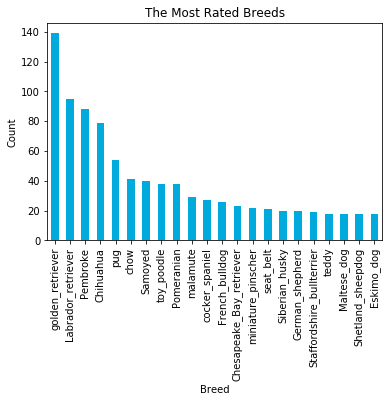

In [45]:
# plot bar chart
rated_breed['p1'].value_counts().plot(kind = 'bar', color = '#00aadd')
plt.title('The Most Rated Breeds')
plt.xlabel("Breed")
plt.ylabel("Count");

As we can see above, golden retrievers have the most common rated breed.

### Analyze ratings

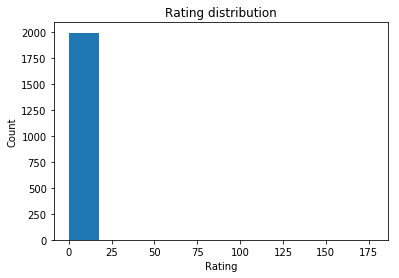

In [46]:
# plot ratings
twitter_clean.rating.plot(kind = 'hist')
plt.title('Rating distribution')
plt.xlabel("Rating")
plt.ylabel("Count");


As we can see above, the rating is generally below 20, let's zoom in for better visualization.

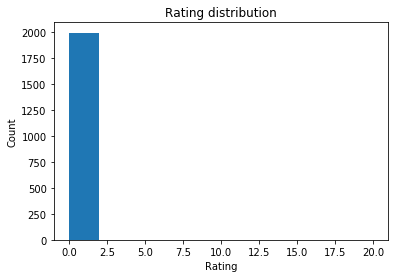

In [47]:
# plot for ratings from 0 to 20
twitter_clean.rating.plot(kind = 'hist', range = [0, 20])
plt.title('Rating distribution')
plt.xlabel("Rating")
plt.ylabel("Count");

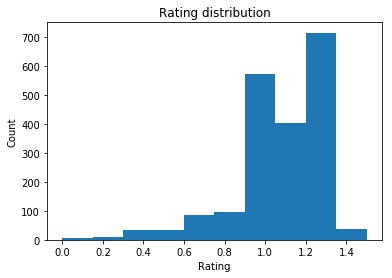

In [48]:
# plot for ratings from 0 to 1.5
twitter_clean.rating.plot(kind = 'hist', range = [0, 1.5])
plt.title('Rating distribution')
plt.xlabel("Rating")
plt.ylabel("Count");

As we can see on the histogram above, the most frequent rating is from 0.9 to 1.3.

### Retweet and favorite count

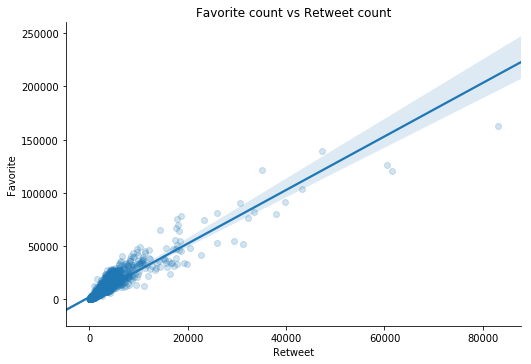

In [49]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweet_count", y="favorite_count", data=twitter_clean,
           aspect=1.5, scatter_kws={'alpha':1/5})
plt.title('Favorite count vs Retweet count')
plt.xlabel('Retweet')
plt.ylabel('Favorite');

In [50]:
# calculate a correlation coefficient
twitter_clean[['favorite_count', 'retweet_count']].corr(method='pearson')


,favorite_count,retweet_count
favorite_count,1.000000,0.929598
retweet_count,0.929598,1.000000


The correlation coefficient between favorite_count and retweet_count is  quite high - 0.929598. It means these variables have a strong correlation. We also can see it on the scatter plot above.